In [23]:
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm 
import csv

In [24]:
df = pd.read_csv("Data/Aviation_Data.csv", low_memory=False)

In [25]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2.02212E+13,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,2.02212E+13,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,2.02212E+13,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [28]:
aviation_df = df.copy()

In [29]:
aviation_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2.02212E+13,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,2.02212E+13,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,2.02212E+13,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [30]:
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [34]:
# Grab only what I need to make it more condensed.
drop_cat = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'Accident.Number', 'Registration.Number', 'Amateur.Built', 'Engine.Type']

In [35]:
aviation_df = aviation_df.drop(columns=drop_cat)

In [36]:
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
       'Number.of.Engines', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition'],
      dtype='object')

In [37]:
new_col = {'Event.Id': 'ID', 'Investigation.Type': 'Type', 'Event.Date':'Date', 'Injury.Severity':'Injury_Severity', 
                    'Aircraft.damage':'Damage_type', 'Number.of.Engines':'Engines', 'Purpose.of.flight':'Flight_Purpose',
                    'Total.Fatal.Injuries':'Fatal_Injuries', 'Total.Serious.Injuries':'Serious_Injuries',
                   'Total.Minor.Injuries':'Minor_Injuries', 'Total.Uninjured':'Uninjured', 'Weather.Condition':'Weather',}


In [38]:
aviation_df.rename(columns=new_col, inplace=True)

In [39]:
aviation_df.head()

,ID,Type,Date,Location,Country,Injury_Severity,Damage_type,Make,Model,Engines,Flight_Purpose,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather
0,20001218X45444,Accident,10/24/1948,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,7/19/1962,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,8/30/1974,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,1.0,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,6/19/1977,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,1.0,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,8/2/1979,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,NaN,Personal,1.0,2.0,NaN,0.0,VMC


In [41]:
make_model_accident_counts = aviation_df.groupby(['Make', 'Model']).size().reset_index(name='AccidentCount', drop=False)
make_model_accident_counts = make_model_accident_counts.sort_values(by='AccidentCount', ascending=False)
make_model_accident_counts

,Make,Model,AccidentCount
5745,Cessna,152,2168
5767,Cessna,172,1254
5811,Cessna,172N,996
15079,Piper,PA-28-140,812
5720,Cessna,150,716
...,...,...,...
8312,Engineering & Research,ERCOUPE 415-CD,1
8314,Engineering and Research,415C,1
8315,Engleman,PITTS S1,1
8316,English,PIETENPOL AIRCAMPER,1


In [42]:
top_10_make_model = make_model_accident_counts.head(10)
top_10_make_model

,Make,Model,AccidentCount
5745,Cessna,152,2168
5767,Cessna,172,1254
5811,Cessna,172N,996
15079,Piper,PA-28-140,812
5720,Cessna,150,716
5809,Cessna,172M,667
5814,Cessna,172P,597
14973,Piper,PA-18,539
5744,Cessna,150M,539
15088,Piper,PA-28-161,502


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Cessna 152'),
  Text(1, 0, 'Cessna 172'),
  Text(2, 0, 'Cessna 172N'),
  Text(3, 0, 'Piper PA-28-140'),
  Text(4, 0, 'Cessna 150'),
  Text(5, 0, 'Cessna 172M'),
  Text(6, 0, 'Cessna 172P'),
  Text(7, 0, 'Piper PA-18'),
  Text(8, 0, 'Cessna 150M'),
  Text(9, 0, 'Piper PA-28-161')])

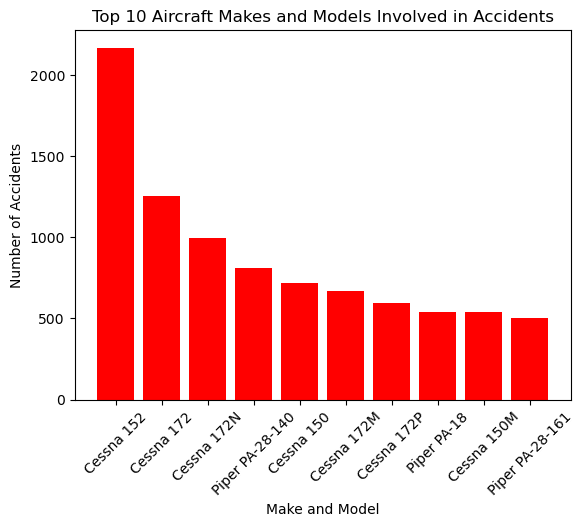

In [65]:
fig, ax = plt.subplots()

ax.bar(top_10_make_model['Make'] + ' ' + top_10_make_model['Model'], top_10_make_model['AccidentCount'], color='red')
ax.set_xlabel('Make and Model')
ax.set_ylabel('Number of Accidents')
ax.set_title('Top 10 Aircraft Makes and Models Involved in Accidents')
plt.xticks(rotation=45)

In [66]:
aviation_df['Weather'] = aviation_df['Weather'].str.upper()

In [67]:
aviation_df['Weather']

0        UNK
1        UNK
2        IMC
3        IMC
4        VMC
        ... 
88884    NaN
88885    NaN
88886    VMC
88887    NaN
88888    NaN
Name: Weather, Length: 88889, dtype: object

In [68]:
aviation_df_weather = aviation_df.dropna(subset=['Weather'])

In [103]:
weather_counts_updated = aviation_df_weather['Weather'].value_counts()
weather_counts_updated

VMC    77303
IMC     5976
UNK     1118
Name: Weather, dtype: int64

In [77]:
aviation_df['Location']

0        MOOSE CREEK, ID
1         BRIDGEPORT, CA
2          Saltville, VA
3             EUREKA, CA
4             Canton, OH
              ...       
88884      Annapolis, MD
88885        Hampton, NH
88886         Payson, AZ
88887         Morgan, UT
88888         Athens, GA
Name: Location, Length: 88889, dtype: object

In [78]:
df_us = df_us = aviation_df[aviation_df['Country'] == 'United States']
df_us.reset_index(drop=True, inplace=True)

In [85]:
df_us.head()
df_us = df_us.copy()

In [86]:
df_us['Location'] = df_us['Location'].str.split(',').str[-1].str.strip()

In [87]:
df_us['Location']

0        ID
1        CA
2        VA
3        CA
4        OH
         ..
82243    MD
82244    NH
82245    AZ
82246    UT
82247    GA
Name: Location, Length: 82248, dtype: object

In [89]:
top_10_states = df_us['Location'].value_counts().head(10)
top_10_states

CA    8857
TX    5913
FL    5825
AK    5672
AZ    2834
CO    2726
WA    2613
IL    2060
MI    2030
GA    2023
Name: Location, dtype: int64

In [90]:
top_10_states.index

Index(['CA', 'TX', 'FL', 'AK', 'AZ', 'CO', 'WA', 'IL', 'MI', 'GA'], dtype='object')

In [92]:
top_10_states.values

array([8857, 5913, 5825, 5672, 2834, 2726, 2613, 2060, 2030, 2023],
      dtype=int64)

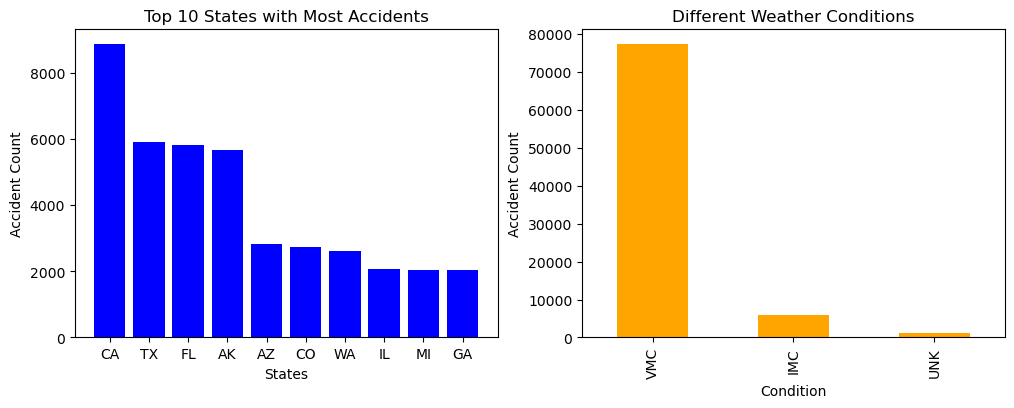

In [104]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].bar(top_10_states.index, top_10_states.values, color='blue')
ax[0].set_xlabel('States')
ax[0].set_ylabel('Accident Count')
ax[0].set_title('Top 10 States with Most Accidents')

weather_counts_updated.plot(kind='bar', color='orange')
ax[1].set_xlabel('Condition')
ax[1].set_ylabel('Accident Count')
ax[1].set_title('Different Weather Conditions');

In [105]:
aviation_df_years = aviation_df.copy()

In [107]:
aviation_df_years['Date']

0        10/24/1948
1         7/19/1962
2         8/30/1974
3         6/19/1977
4          8/2/1979
            ...    
88884    12/26/2022
88885    12/26/2022
88886    12/26/2022
88887    12/26/2022
88888    12/29/2022
Name: Date, Length: 88889, dtype: object

In [109]:
aviation_df['Date'] = pd.to_datetime(aviation_df['Date'])
aviation_df['Year'] = aviation_df['Date'].dt.year

In [110]:
aviation_df['Year']

0        1948
1        1962
2        1974
3        1977
4        1979
         ... 
88884    2022
88885    2022
88886    2022
88887    2022
88888    2022
Name: Year, Length: 88889, dtype: int64

In [120]:
df_us_filtered = aviation_df[aviation_df['Year'] >= 1982]
accidents_by_year = df_us_filtered['Year'].value_counts().sort_index()

In [121]:
accidents_by_year

1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
Name: Year, dtype: int64

(array([1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020.,
        2025.]),
 [Text(1980.0, 0, '1980'),
  Text(1985.0, 0, '1985'),
  Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

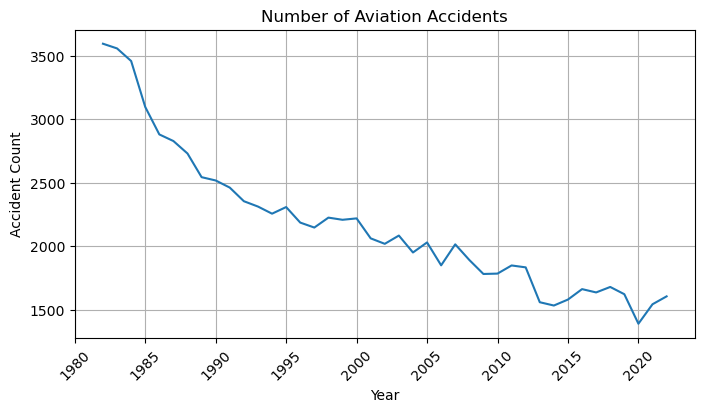

In [124]:
plt.figure(figsize=(8, 4))
plt.plot(accidents_by_year.index, accidents_by_year.values, linestyle='-')
plt.title('Number of Aviation Accidents')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.grid(True)
plt.xticks(rotation=45)